In [14]:
# Задача: Дана функция f(x) = (sin(x)/2 + cos(x)/2)^2 * sin(x)\n"
# 1. Определить корни
# 2. Найти интервалы, на которых функция возрастает
# 3. Найти интервалы, на которых функция убывает
# 4. Построить график
# 5. Вычислить вершину
# 6. Определить промежутки, на котором f > 0
# 7. Определить промежутки, на котором f < 0

In [3]:
from sympy import Symbol, diff, plot, S, Interval
from sympy.solvers import solve, solveset
from sympy import pi, sin, cos, periodicity, simplify, trigsimp, evalf, Derivative

In [4]:
x = Symbol('x', real = True)
y = (sin(x)/2 + cos(x)/2)**2 * sin(x)
y

(sin(x)/2 + cos(x)/2)**2*sin(x)

In [5]:
# Определяем корни
extremum = solve(y, x)
extremum

[0, -pi/4, 3*pi/4, pi]

In [6]:
derivate = diff(y, x)
derivate

(-sin(x) + cos(x))*(sin(x)/2 + cos(x)/2)*sin(x) + (sin(x)/2 + cos(x)/2)**2*cos(x)

In [7]:
periodicity(y, x)

2*pi

In [8]:
deriv_roots = solve(derivate, x)
deriv_roots

[-pi/4,
 3*pi/4,
 -2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2),
 2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2),
 2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2),
 2*atan(-sqrt(6)*sqrt(sqrt(17) + 5)/2 + 3/2 + sqrt(17)/2)]

In [9]:
deriv_roots_list = []
for i in deriv_roots:
    deriv_roots_list.append(round(i.evalf(),2))
deriv_roots_list.insert(0, -2*pi)
deriv_roots_list.append(2*pi)
deriv_roots_list

[-2*pi, -0.79, 2.36, -2.08, 2.87, 1.06, -0.27, 2*pi]

In [10]:
deriv_roots_list.sort()
deriv_roots_list

[-2*pi, -2.08, -0.79, -0.27, 1.06, 2.36, 2.87, 2*pi]

In [13]:
intervals = []
i = 0
for i in range(0, len(deriv_roots_list)-1):
    intervals.append(Interval(deriv_roots_list[i], deriv_roots_list[i+1]))
    i = i + 1
intervals

[Interval(-2*pi, -2.08),
 Interval(-2.08, -0.79),
 Interval(-0.79, -0.27),
 Interval(-0.27, 1.06),
 Interval(1.06, 2.36),
 Interval(2.36, 2.87),
 Interval(2.87, 2*pi)]

In [14]:
# Находим интервалы на которых функция возрастает
for i in range(0, len(deriv_roots_list)-1):
    point = round((deriv_roots_list[i] + (deriv_roots_list[i+1] - deriv_roots_list[i])/2).evalf(),2)
    if point > 0:
        print(f'{intervals[i]} - функция возрастает')
    else: 
        print(f'{intervals[i]} - функция убывает')

Interval(-2*pi, -2.08) - функция убывает
Interval(-2.08, -0.79) - функция убывает
Interval(-0.79, -0.27) - функция убывает
Interval(-0.27, 1.06) - функция возрастает
Interval(1.06, 2.36) - функция возрастает
Interval(2.36, 2.87) - функция возрастает
Interval(2.87, 2*pi) - функция возрастает


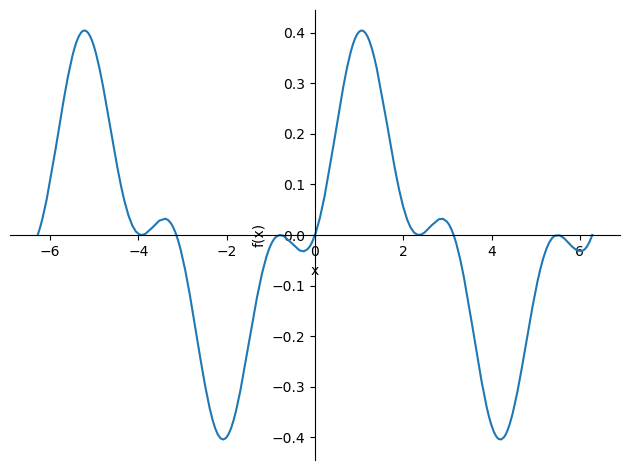

In [15]:
# Строим график
function_graph = plot(y, (x, -2*pi, 2*pi))

In [16]:
# Вычислям вершины
function_top = deriv_roots_list[1:-1]
count = 1
print('Вершины функции:\n')
for i in function_top:
    print(f'{count}: x = {i}, y = {round(y.subs(x, i).evalf(),2)}')
    count += 1

Вершины функции:

1: x = -2.08, y = -0.40
2: x = -0.79, y = 0.0
3: x = -0.27, y = -0.03
4: x = 1.06, y = 0.40
5: x = 2.36, y = 0.0
6: x = 2.87, y = 0.03


In [21]:
# Определяем промежутки, на котором f > 0
solveset(y > 0, x, S.Reals)

Union(Interval.open(0, 3*pi/4), Interval.open(3*pi/4, pi))

In [22]:
# Определяем промежутки, на котором f < 0
solveset(y < 0, x, S.Reals)

Union(Interval.open(pi, 7*pi/4), Interval.open(7*pi/4, 2*pi))